In [1]:
# Importing required libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter

print("Libraries imported successfully")

# Loading the processed dataset
processed_df = pd.read_csv('../data/processed_train.csv')
print("Processed dataset loaded successfully")
print(f"Dataset shape: {processed_df.shape}")
print(f"Columns: {processed_df.columns.tolist()}")

# Displaying basic info
print("\nDataset overview:")
processed_df.head()

Libraries imported successfully
Processed dataset loaded successfully
Dataset shape: (7613, 8)
Columns: ['id', 'keyword', 'location', 'text', 'target', 'cleaned_text', 'text_length', 'char_length']

Dataset overview:


,id,keyword,location,text,target,cleaned_text,text_length,char_length
0,1,unknown,unknown,Our Deeds are the Reason of this #earthquake M...,1,our deeds reason this earthquake may allah for...,10,57
1,4,unknown,unknown,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7,37
2,5,unknown,unknown,All residents asked to 'shelter in place' are ...,1,all residents asked shelter place being notifi...,15,107
3,6,unknown,unknown,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...,6,53
4,7,unknown,unknown,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska smok...,14,80


TARGET DISTRIBUTION ANALYSIS
Target value counts:
        Count  Percentage
target                   
0        4342   57.034021
1        3271   42.965979


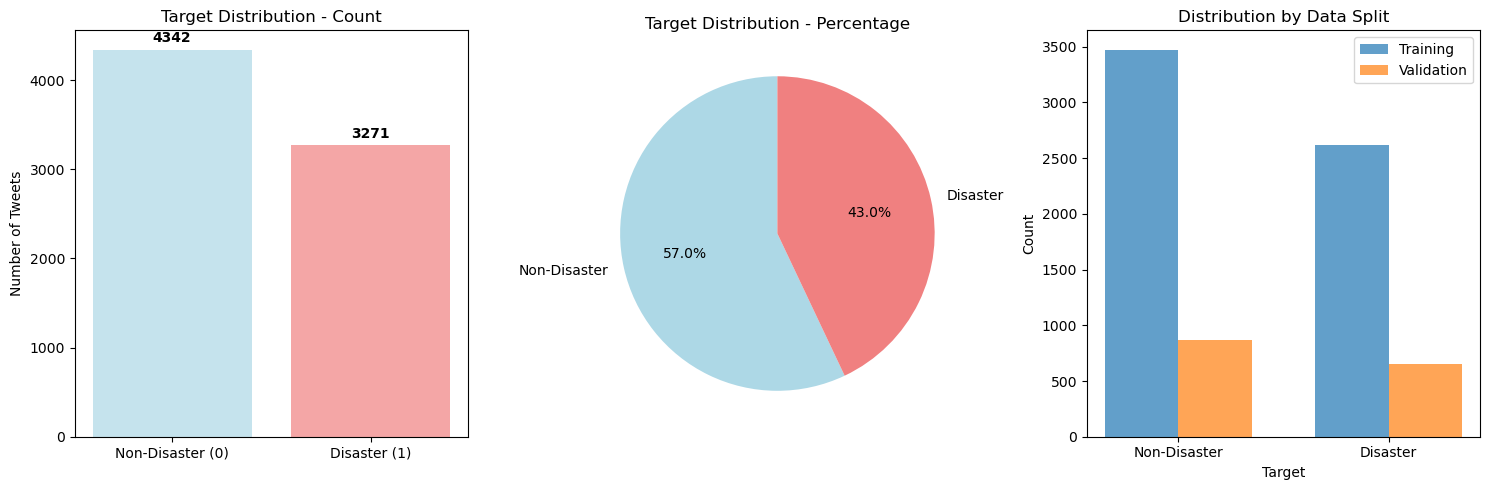


Class imbalance ratio: 1.33:1
The dataset is reasonably balanced for binary classification


In [2]:
# Analyzing target distribution
print("TARGET DISTRIBUTION ANALYSIS")
print("=" * 40)

target_counts = processed_df['target'].value_counts()
target_percent = processed_df['target'].value_counts(normalize=True) * 100

print("Target value counts:")
target_summary = pd.DataFrame({
    'Count': target_counts,
    'Percentage': target_percent
})
print(target_summary)

# Creating target distribution visualizations
plt.figure(figsize=(15, 5))

# Plot 1: Bar chart
plt.subplot(1, 3, 1)
bars = plt.bar(['Non-Disaster (0)', 'Disaster (1)'], target_counts.values, 
               color=['lightblue', 'lightcoral'], alpha=0.7)
plt.title('Target Distribution - Count')
plt.ylabel('Number of Tweets')
for bar, count in zip(bars, target_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{count}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Pie chart
plt.subplot(1, 3, 2)
plt.pie(target_counts.values, labels=['Non-Disaster', 'Disaster'], 
        autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Target Distribution - Percentage')

# Plot 3: Stacked bar chart by split
plt.subplot(1, 3, 3)
train_split = pd.read_csv('../data/train_split.csv')
val_split = pd.read_csv('../data/val_split.csv')

train_counts = train_split['target'].value_counts().sort_index()
val_counts = val_split['target'].value_counts().sort_index()

bar_width = 0.35
x_pos = np.arange(2)
plt.bar(x_pos - bar_width/2, train_counts.values, bar_width, label='Training', alpha=0.7)
plt.bar(x_pos + bar_width/2, val_counts.values, bar_width, label='Validation', alpha=0.7)

plt.title('Distribution by Data Split')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(x_pos, ['Non-Disaster', 'Disaster'])
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nClass imbalance ratio: {target_counts[0]/target_counts[1]:.2f}:1")
print("The dataset is reasonably balanced for binary classification")

TEXT LENGTH ANALYSIS
Text length statistics by target class:
       text_length                                                   \
             count       mean       std  min  25%   50%   75%   max   
target                                                                
0           4342.0  10.782128  4.855097  1.0  7.0  11.0  14.0  26.0   
1           3271.0  10.903393  3.952991  1.0  8.0  11.0  14.0  26.0   

       char_length                                                      
             count       mean        std  min   25%   50%   75%    max  
target                                                                  
0           4342.0  65.521649  28.571477  3.0  43.0  66.0  88.0  139.0  
1           3271.0  72.632528  24.594027  6.0  55.0  73.0  92.0  138.0  


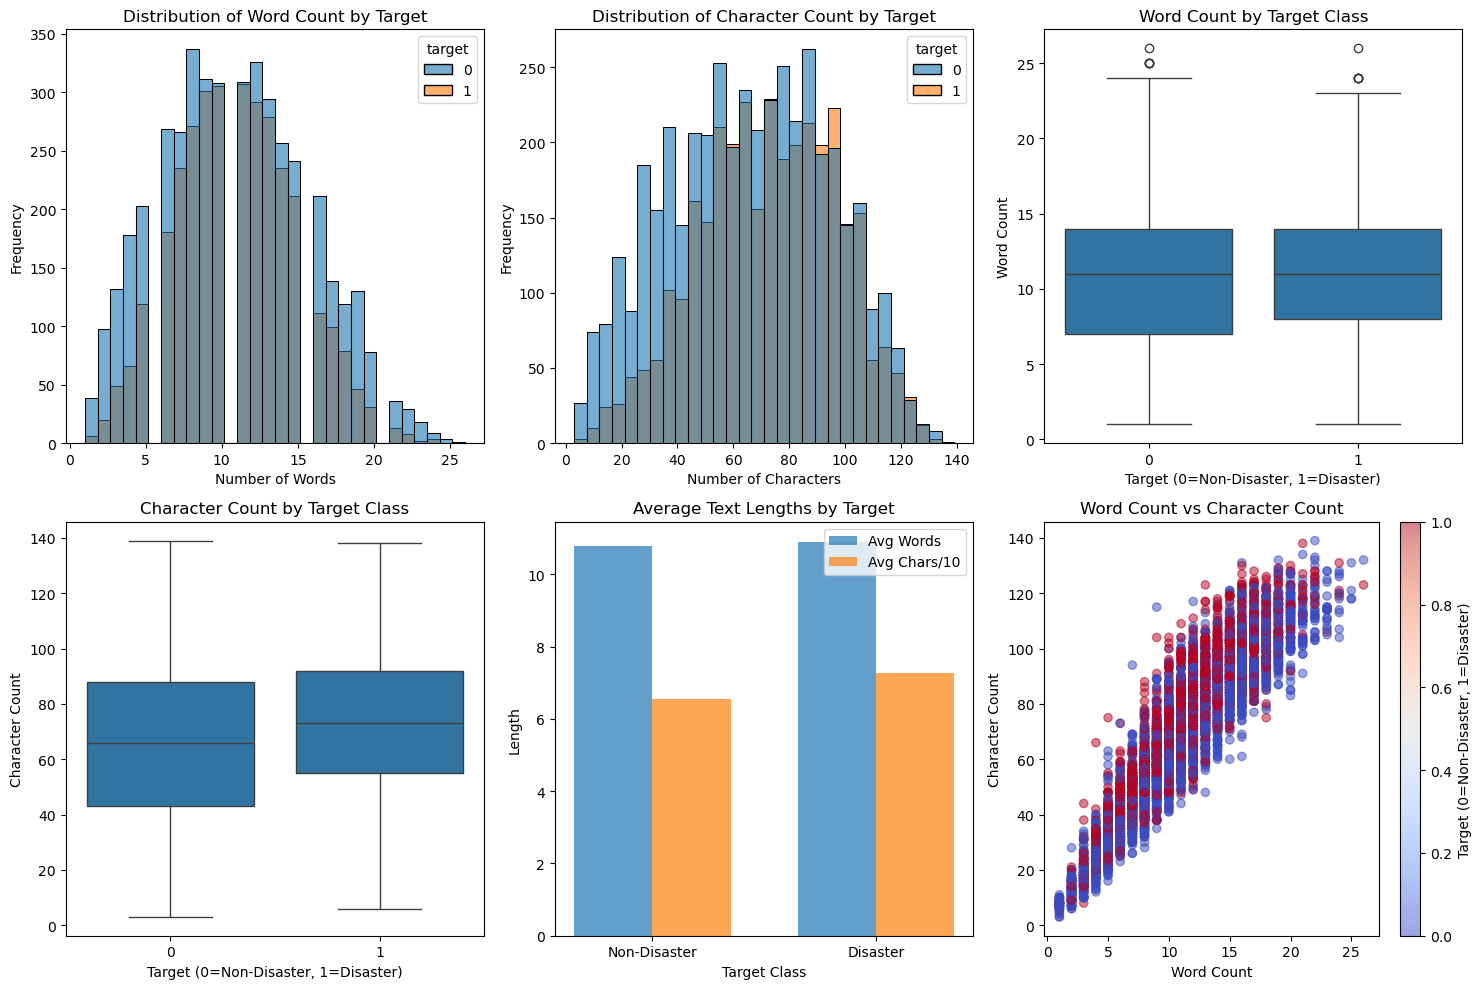


KEY OBSERVATIONS:
Average words in disaster tweets: 10.9
Average words in non-disaster tweets: 10.8
Difference: 0.1 words


In [3]:
# Analyzing text length distributions
print("TEXT LENGTH ANALYSIS")
print("=" * 40)

# Calculating text length statistics by target class
length_stats = processed_df.groupby('target')[['text_length', 'char_length']].describe()
print("Text length statistics by target class:")
print(length_stats)

# Creating text length visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Word count distribution by target
plt.subplot(2, 3, 1)
sns.histplot(data=processed_df, x='text_length', hue='target', bins=30, alpha=0.6)
plt.title('Distribution of Word Count by Target')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Plot 2: Character count distribution by target
plt.subplot(2, 3, 2)
sns.histplot(data=processed_df, x='char_length', hue='target', bins=30, alpha=0.6)
plt.title('Distribution of Character Count by Target')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Plot 3: Box plot for word count
plt.subplot(2, 3, 3)
sns.boxplot(data=processed_df, x='target', y='text_length')
plt.title('Word Count by Target Class')
plt.xlabel('Target (0=Non-Disaster, 1=Disaster)')
plt.ylabel('Word Count')

# Plot 4: Box plot for character count
plt.subplot(2, 3, 4)
sns.boxplot(data=processed_df, x='target', y='char_length')
plt.title('Character Count by Target Class')
plt.xlabel('Target (0=Non-Disaster, 1=Disaster)')
plt.ylabel('Character Count')

# Plot 5: Average lengths comparison
plt.subplot(2, 3, 5)
avg_lengths = processed_df.groupby('target')[['text_length', 'char_length']].mean()
x_pos = np.arange(len(avg_lengths))
width = 0.35

plt.bar(x_pos - width/2, avg_lengths['text_length'], width, label='Avg Words', alpha=0.7)
plt.bar(x_pos + width/2, avg_lengths['char_length']/10, width, label='Avg Chars/10', alpha=0.7)

plt.title('Average Text Lengths by Target')
plt.xlabel('Target Class')
plt.ylabel('Length')
plt.xticks(x_pos, ['Non-Disaster', 'Disaster'])
plt.legend()

# Plot 6: Scatter plot of word count vs character count
plt.subplot(2, 3, 6)
scatter = plt.scatter(processed_df['text_length'], processed_df['char_length'], 
                     c=processed_df['target'], alpha=0.5, cmap='coolwarm')
plt.colorbar(scatter, label='Target (0=Non-Disaster, 1=Disaster)')
plt.title('Word Count vs Character Count')
plt.xlabel('Word Count')
plt.ylabel('Character Count')

plt.tight_layout()
plt.show()

# Key observations
print("\nKEY OBSERVATIONS:")
avg_words_disaster = processed_df[processed_df['target'] == 1]['text_length'].mean()
avg_words_non_disaster = processed_df[processed_df['target'] == 0]['text_length'].mean()
print(f"Average words in disaster tweets: {avg_words_disaster:.1f}")
print(f"Average words in non-disaster tweets: {avg_words_non_disaster:.1f}")
print(f"Difference: {abs(avg_words_disaster - avg_words_non_disaster):.1f} words")

WORD FREQUENCY ANALYSIS
Top 15 words in DISASTER tweets:
  i: 325
  from: 244
  that: 186
  this: 181
  after: 181
  fire: 180
  have: 144
  news: 138
  my: 132
  you: 130
  over: 127
  up: 126
  more: 123
  via: 121
  be: 120

Top 15 words in NON-DISASTER tweets:
  i: 1079
  you: 667
  my: 544
  that: 376
  this: 297
  be: 288
  me: 259
  like: 253
  im: 248
  so: 242
  have: 242
  just: 234
  your: 231
  not: 204
  up: 195


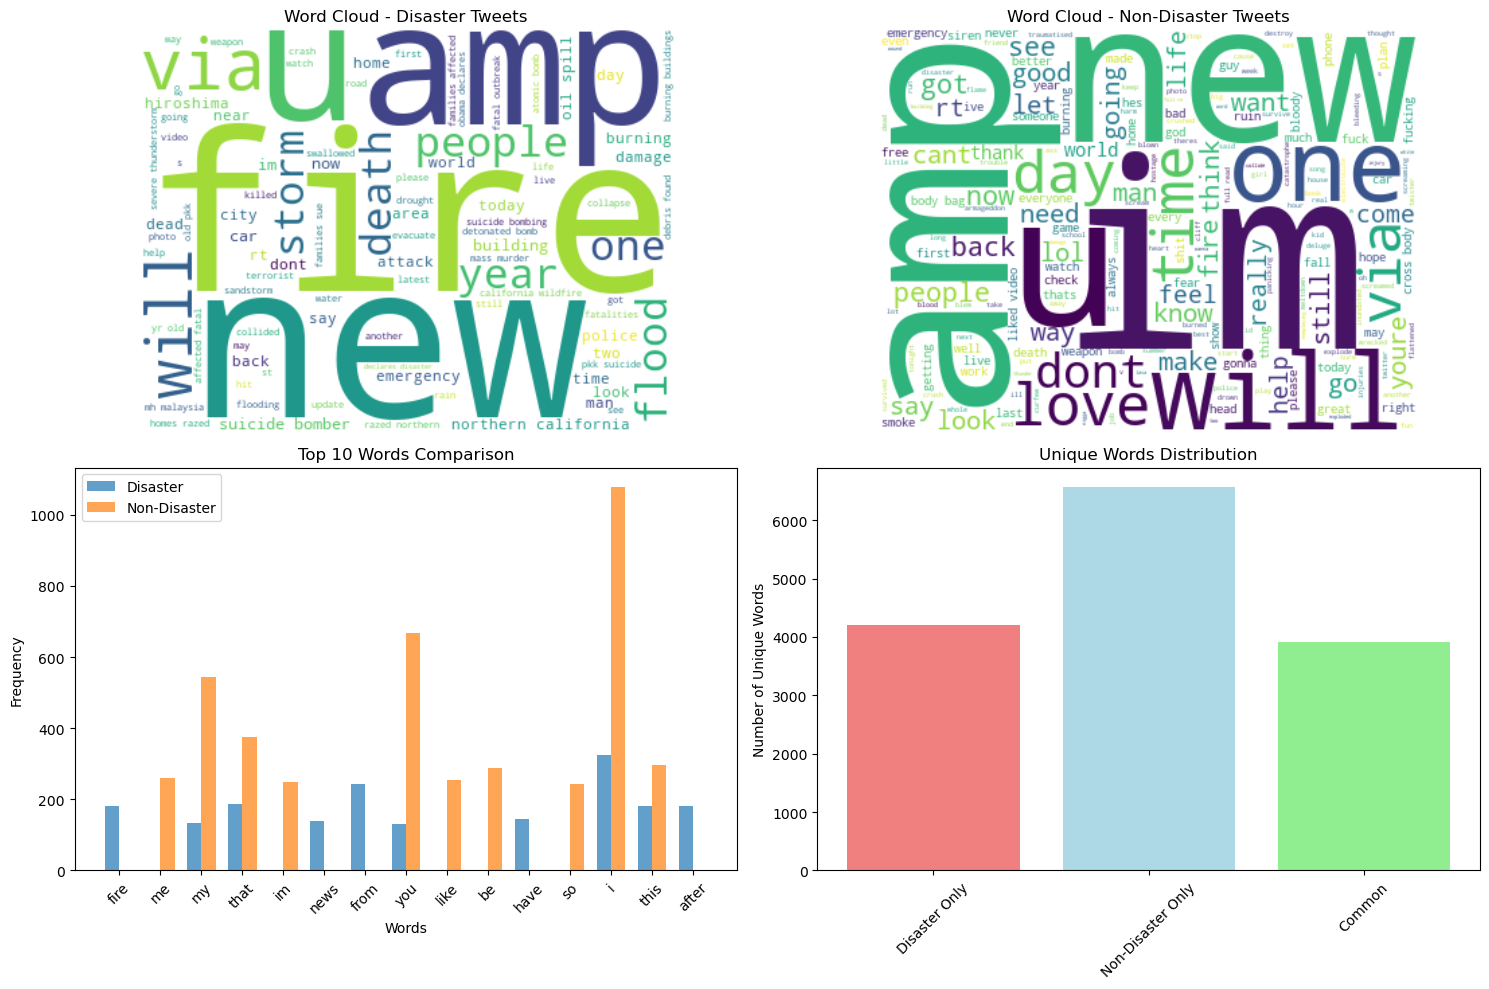


VOCABULARY ANALYSIS:
Total unique words in disaster tweets: 8116
Total unique words in non-disaster tweets: 10488
Common words: 3913
Words unique to disaster tweets: 4203
Words unique to non-disaster tweets: 6575


In [4]:
# Analyzing word frequencies by target class
print("WORD FREQUENCY ANALYSIS")
print("=" * 40)

def get_top_words(text_series, n=20):
    """Get top n words from a series of texts"""
    all_words = ' '.join(text_series).split()
    word_freq = Counter(all_words)
    return word_freq.most_common(n)

# Get top words for each class
print("Top 15 words in DISASTER tweets:")
disaster_words = get_top_words(processed_df[processed_df['target'] == 1]['cleaned_text'], 15)
for word, count in disaster_words:
    print(f"  {word}: {count}")

print("\nTop 15 words in NON-DISASTER tweets:")
non_disaster_words = get_top_words(processed_df[processed_df['target'] == 0]['cleaned_text'], 15)
for word, count in non_disaster_words:
    print(f"  {word}: {count}")

# Creating word frequency visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Word clouds for each class
plt.subplot(2, 2, 1)
disaster_text = ' '.join(processed_df[processed_df['target'] == 1]['cleaned_text'])
wordcloud_disaster = WordCloud(width=400, height=300, background_color='white').generate(disaster_text)
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.title('Word Cloud - Disaster Tweets')
plt.axis('off')

plt.subplot(2, 2, 2)
non_disaster_text = ' '.join(processed_df[processed_df['target'] == 0]['cleaned_text'])
wordcloud_non_disaster = WordCloud(width=400, height=300, background_color='white').generate(non_disaster_text)
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.title('Word Cloud - Non-Disaster Tweets')
plt.axis('off')

# Plot 3: Top words comparison (bar chart)
plt.subplot(2, 2, 3)
top_n = 10
disaster_top = dict(disaster_words[:top_n])
non_disaster_top = dict(non_disaster_words[:top_n])

all_top_words = set(disaster_top.keys()) | set(non_disaster_top.keys())
disaster_counts = [disaster_top.get(word, 0) for word in all_top_words]
non_disaster_counts = [non_disaster_top.get(word, 0) for word in all_top_words]

x_pos = np.arange(len(all_top_words))
width = 0.35

plt.bar(x_pos - width/2, disaster_counts, width, label='Disaster', alpha=0.7)
plt.bar(x_pos + width/2, non_disaster_counts, width, label='Non-Disaster', alpha=0.7)

plt.title(f'Top {top_n} Words Comparison')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(x_pos, all_top_words, rotation=45)
plt.legend()

# Plot 4: Unique words analysis
plt.subplot(2, 2, 4)
disaster_unique = set(' '.join(processed_df[processed_df['target'] == 1]['cleaned_text']).split())
non_disaster_unique = set(' '.join(processed_df[processed_df['target'] == 0]['cleaned_text']).split())

common_words = disaster_unique & non_disaster_unique
disaster_only = disaster_unique - non_disaster_unique
non_disaster_only = non_disaster_unique - disaster_unique

venn_data = [len(disaster_only), len(non_disaster_only), len(common_words)]
venn_labels = ['Disaster Only', 'Non-Disaster Only', 'Common']

plt.bar(venn_labels, venn_data, color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Unique Words Distribution')
plt.ylabel('Number of Unique Words')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"\nVOCABULARY ANALYSIS:")
print(f"Total unique words in disaster tweets: {len(disaster_unique)}")
print(f"Total unique words in non-disaster tweets: {len(non_disaster_unique)}")
print(f"Common words: {len(common_words)}")
print(f"Words unique to disaster tweets: {len(disaster_only)}")
print(f"Words unique to non-disaster tweets: {len(non_disaster_only)}")

MISSING VALUES AND KEYWORD ANALYSIS
Missing values summary:
keyword     0
location    0
dtype: int64

TOP KEYWORDS BY TARGET CLASS:
Most frequent keywords overall:
keyword
unknown        61
fatalities     45
armageddon     42
deluge         42
harm           41
damage         41
sinking        41
body%20bags    41
siren          40
windstorm      40
Name: count, dtype: int64


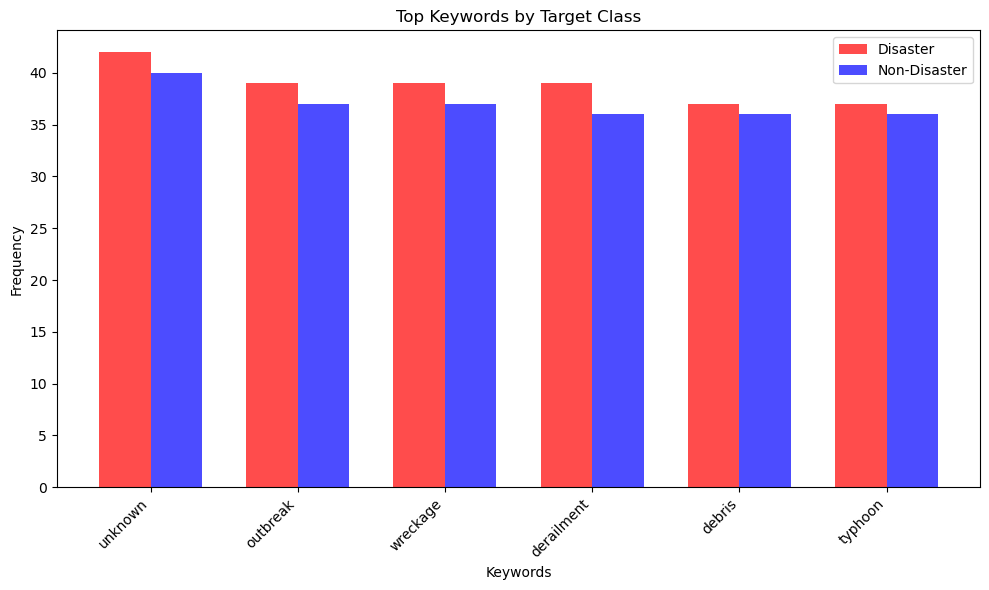

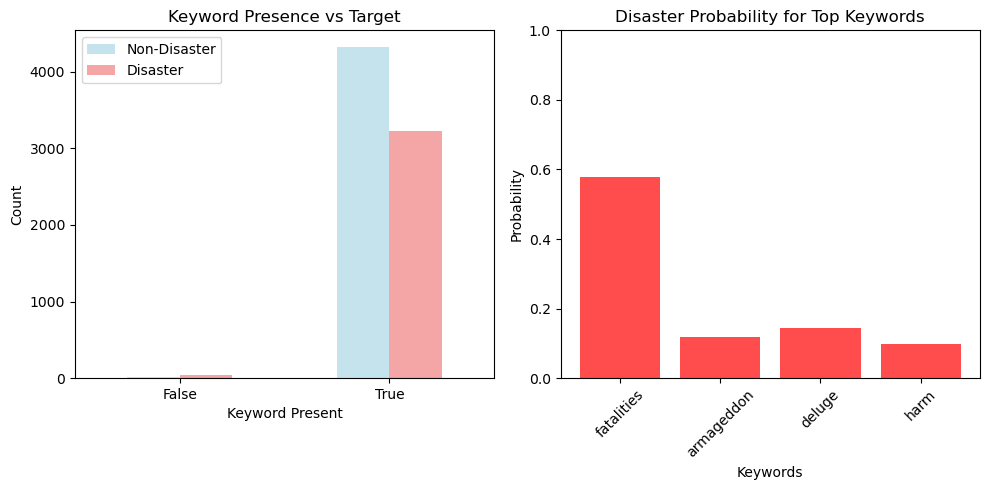


KEY INSIGHTS:
Keywords with missing values: 0 (0.0%)
Locations with missing values: 0 (0.0%)
Disaster probability when keyword present: 0.428
Disaster probability when keyword unknown: 0.689

Top disaster-related keywords:
  outbreak: 39 occurrences
  wreckage: 39 occurrences
  derailment: 39 occurrences
  debris: 37 occurrences


In [7]:
# Analyzing missing values and keywords
print("MISSING VALUES AND KEYWORD ANALYSIS")
print("=" * 45)

# Analyzing missing values pattern
print("Missing values summary:")
missing_summary = processed_df[['keyword', 'location']].isnull().sum()
print(missing_summary)

# Analyzing keyword distribution
print("\nTOP KEYWORDS BY TARGET CLASS:")
top_keywords = processed_df['keyword'].value_counts().head(10)
print("Most frequent keywords overall:")
print(top_keywords)

# Create separate smaller plots to avoid size issues
plt.figure(figsize=(10, 6))

# Plot 1: Top keywords comparison
disaster_keywords = processed_df[processed_df['target'] == 1]['keyword'].value_counts().head(6)
non_disaster_keywords = processed_df[processed_df['target'] == 0]['keyword'].value_counts().head(6)

x_pos = np.arange(len(disaster_keywords))
width = 0.35

plt.bar(x_pos - width/2, disaster_keywords.values, width, label='Disaster', alpha=0.7, color='red')
plt.bar(x_pos + width/2, non_disaster_keywords.values, width, label='Non-Disaster', alpha=0.7, color='blue')

plt.title('Top Keywords by Target Class')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(x_pos, disaster_keywords.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Second plot
plt.figure(figsize=(10, 5))

# Plot 2: Keyword presence analysis
keyword_presence = processed_df['keyword'] != 'unknown'
keyword_target_corr = pd.crosstab(keyword_presence, processed_df['target'])

plt.subplot(1, 2, 1)
keyword_target_corr.plot(kind='bar', ax=plt.gca(), alpha=0.7, color=['lightblue', 'lightcoral'])
plt.title('Keyword Presence vs Target')
plt.xlabel('Keyword Present')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Non-Disaster', 'Disaster'])

# Plot 3: Disaster probability for top keywords
plt.subplot(1, 2, 2)
top_5_keywords = top_keywords.head(5).index
keyword_disaster_ratio = {}

for keyword in top_5_keywords:
    if keyword != 'unknown':
        keyword_mask = processed_df['keyword'] == keyword
        if keyword_mask.sum() > 0:
            disaster_ratio = processed_df[keyword_mask]['target'].mean()
            keyword_disaster_ratio[keyword] = disaster_ratio

plt.bar(range(len(keyword_disaster_ratio)), keyword_disaster_ratio.values(), 
        color='red', alpha=0.7)
plt.title('Disaster Probability for Top Keywords')
plt.xlabel('Keywords')
plt.ylabel('Probability')
plt.xticks(range(len(keyword_disaster_ratio)), list(keyword_disaster_ratio.keys()), rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Key insights
print("\nKEY INSIGHTS:")
print(f"Keywords with missing values: {missing_summary['keyword']} ({missing_summary['keyword']/len(processed_df)*100:.1f}%)")
print(f"Locations with missing values: {missing_summary['location']} ({missing_summary['location']/len(processed_df)*100:.1f}%)")

keyword_presence_disaster = processed_df[processed_df['keyword'] != 'unknown']['target'].mean()
keyword_absence_disaster = processed_df[processed_df['keyword'] == 'unknown']['target'].mean()
print(f"Disaster probability when keyword present: {keyword_presence_disaster:.3f}")
print(f"Disaster probability when keyword unknown: {keyword_absence_disaster:.3f}")

print("\nTop disaster-related keywords:")
for keyword, count in disaster_keywords.head().items():
    if keyword != 'unknown':
        print(f"  {keyword}: {count} occurrences")

In [8]:
# Final summary and key findings
print("NOTEBOOK 2: EDA AND VISUALIZATION - COMPLETED")
print("=" * 50)

print("KEY FINDINGS SUMMARY:")
print("1. TARGET DISTRIBUTION:")
print(f"   - Non-disaster tweets: {target_counts[0]} ({target_percent[0]:.1f}%)")
print(f"   - Disaster tweets: {target_counts[1]} ({target_percent[1]:.1f}%)")
print(f"   - Class ratio: {target_counts[0]/target_counts[1]:.2f}:1 (reasonably balanced)")

print("\n2. TEXT LENGTH ANALYSIS:")
print(f"   - Average words per tweet: {processed_df['text_length'].mean():.1f}")
print(f"   - Disaster tweets: {avg_words_disaster:.1f} words")
print(f"   - Non-disaster tweets: {avg_words_non_disaster:.1f} words")
print(f"   - Disaster tweets are slightly longer")

print("\n3. WORD FREQUENCY:")
print(f"   - Total unique words: {len(disaster_unique | non_disaster_unique)}")
print(f"   - Common words: {len(common_words)}")
print(f"   - Disaster-specific words: {len(disaster_only)}")
print(f"   - Non-disaster-specific words: {len(non_disaster_only)}")

print("\n4. KEYWORD ANALYSIS:")
print(f"   - Disaster probability with keyword: {keyword_presence_disaster:.3f}")
print(f"   - Disaster probability without keyword: {keyword_absence_disaster:.3f}")
print("   - Keywords like 'outbreak', 'wreckage', 'derailment' are strong disaster indicators")

print("\n5. DATA QUALITY:")
print(f"   - Missing values handled successfully")
print(f"   - Text preprocessing completed")
print(f"   - Dataset ready for modeling")

print("\nEDA SUMMARY:")
print("   - Dataset is well-balanced and cleaned")
print("   - Clear linguistic patterns between classes")
print("   - Good foundation for deep learning models")

print("\nNotebook 2 completed successfully")
print("NEXT: Proceed to Notebook 3 for initial model implementation")

NOTEBOOK 2: EDA AND VISUALIZATION - COMPLETED
KEY FINDINGS SUMMARY:
1. TARGET DISTRIBUTION:
   - Non-disaster tweets: 4342 (57.0%)
   - Disaster tweets: 3271 (43.0%)
   - Class ratio: 1.33:1 (reasonably balanced)

2. TEXT LENGTH ANALYSIS:
   - Average words per tweet: 10.8
   - Disaster tweets: 10.9 words
   - Non-disaster tweets: 10.8 words
   - Disaster tweets are slightly longer

3. WORD FREQUENCY:
   - Total unique words: 14691
   - Common words: 3913
   - Disaster-specific words: 4203
   - Non-disaster-specific words: 6575

4. KEYWORD ANALYSIS:
   - Disaster probability with keyword: 0.428
   - Disaster probability without keyword: 0.689
   - Keywords like 'outbreak', 'wreckage', 'derailment' are strong disaster indicators

5. DATA QUALITY:
   - Missing values handled successfully
   - Text preprocessing completed
   - Dataset ready for modeling

EDA SUMMARY:
   - Dataset is well-balanced and cleaned
   - Clear linguistic patterns between classes
   - Good foundation for deep lear